### Apply ML algorithms

- Linear Regression
- Lasso Regression
- Decision Tree Regressor
- KNN Regressor
- RandomForestRegressor
- Xgboost Regressor
- Hyperparameter Tuning
- ANN- Artificial Neural Network

In [1]:
# importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the dataset
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')

### Performing EDA

In [3]:
#checking the shape
df.shape

(1090, 9)

In [4]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


#### About the dataset
* T ----> Average Temperature (°C)
* TM ----> Maximum temperature (°C)
* Tm ----> Minimum temperature (°C)
* SLP ----> Atmospheric pressure at sea level (hPa)
* H ----> Average relative humidity (%)
* VV ----> Average visibility (Km)
* V ----> Average wind speed (Km/h)
* VM ----> Maximum sustained wind speed (Km/h)
* PM2.5----> Atmospheric particulate matter
#### Note: Here PM2.5 is our response variable and all others are our predictors

In [5]:
## Check for null values
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

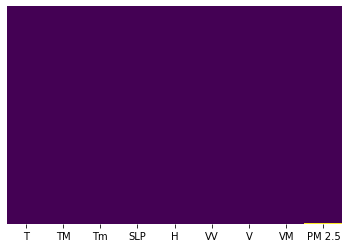

In [6]:
# visualizing the null values using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Note : as we can see , there is only one missing value and this is because we have handled the missing values while creating the dataset itself.

In [7]:
df.dropna(inplace = True)

In [8]:
#checking the shape after droping null value
df.shape

(1089, 9)

In [9]:
df.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,25.691001,32.456015,19.335904,1007.953627,63.361800,2.009091,6.486226,15.658127,108.255571
std,7.221801,6.689772,7.571620,7.543222,15.864067,0.728200,3.890672,7.565392,82.250446
min,6.700000,9.800000,0.000000,990.400000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.000000,27.700000,12.100000,1001.200000,54.000000,1.600000,3.500000,11.100000,43.958333
50%,27.900000,34.400000,21.400000,1007.900000,65.000000,1.900000,5.900000,14.800000,83.458333
75%,31.400000,37.000000,26.000000,1014.800000,75.000000,2.600000,8.900000,18.300000,152.554167
max,38.500000,45.500000,34.000000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 0 to 1088
Data columns (total 9 columns):
T         1089 non-null float64
TM        1089 non-null float64
Tm        1089 non-null float64
SLP       1089 non-null float64
H         1089 non-null float64
VV        1089 non-null float64
V         1089 non-null float64
VM        1089 non-null float64
PM 2.5    1089 non-null float64
dtypes: float64(9)
memory usage: 85.1 KB


#### Note : All the features have numerical data and therefore there is no need of handling categorical features.

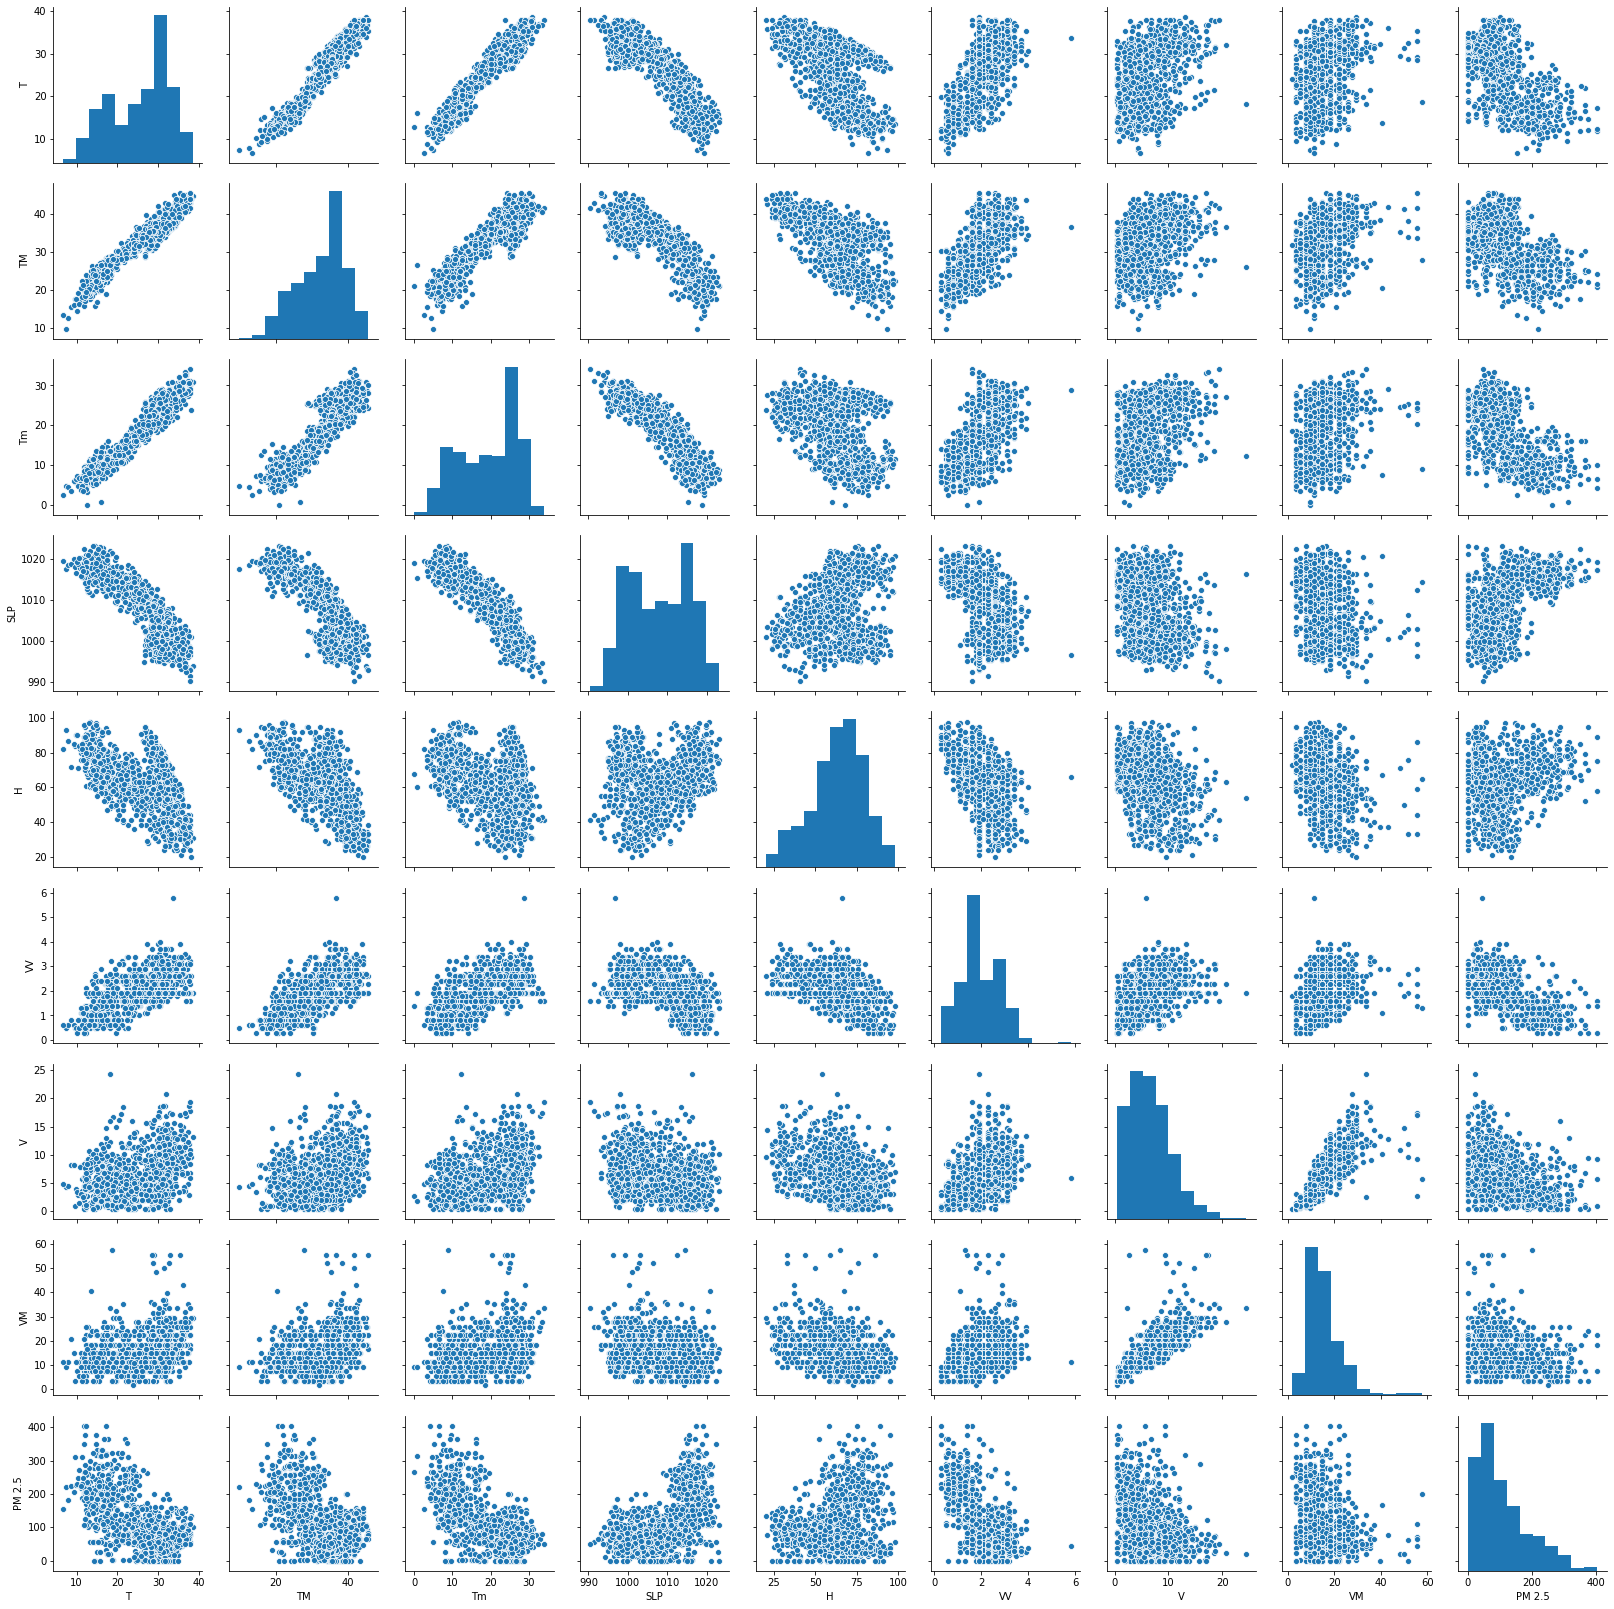

In [11]:
sns.pairplot(df)

### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

In [12]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.963449,0.957201,-0.883486,-0.490205,0.625555,0.320452,0.277059,-0.628969
TM,0.963449,1.000000,0.889894,-0.826497,-0.578128,0.598582,0.303434,0.286205,-0.564433
Tm,0.957201,0.889894,1.000000,-0.912356,-0.276291,0.547673,0.312404,0.244846,-0.661353
SLP,-0.883486,-0.826497,-0.912356,1.000000,0.234018,-0.483668,-0.326082,-0.269664,0.604863
H,-0.490205,-0.578128,-0.276291,0.234018,1.000000,-0.489742,-0.356407,-0.369083,0.166341
VV,0.625555,0.598582,0.547673,-0.483668,-0.489742,1.000000,0.369990,0.326173,-0.593240
V,0.320452,0.303434,0.312404,-0.326082,-0.356407,0.369990,1.000000,0.780994,-0.327888
VM,0.277059,0.286205,0.244846,-0.269664,-0.369083,0.326173,0.780994,1.000000,-0.262803
PM 2.5,-0.628969,-0.564433,-0.661353,0.604863,0.166341,-0.593240,-0.327888,-0.262803,1.000000


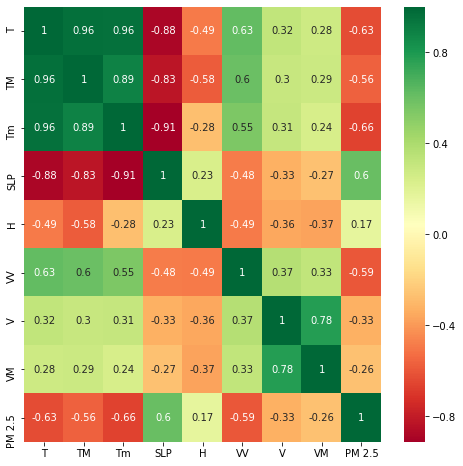

In [13]:
#plotting correlation heat map
plt.figure(figsize=(8,8))
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

#### Separating X and y values

In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

### Feature Importance
* You can get the importance of each feature of your dataset by using the feature importance property of the model.
* Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
* Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [15]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\vinay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [16]:
print(model.feature_importances_)

[0.12466822 0.09478924 0.2633024  0.12811754 0.07515662 0.21815885
 0.05346158 0.04234555]


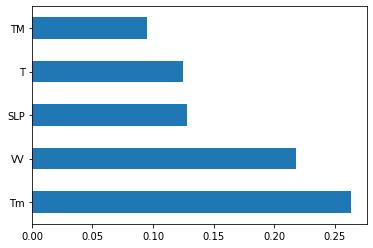

In [17]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

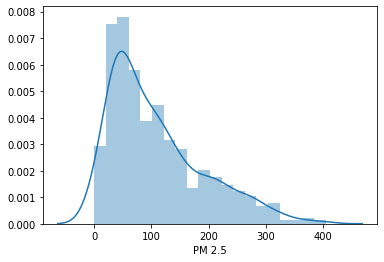

In [18]:
sns.distplot(y)

### Train Test split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#weights / slope values
regressor.coef_

array([  0.40455966,  -0.27453627,  -5.09300799,   0.23474014,
        -1.02631694, -45.47124358,  -0.81246813,  -0.78319677])

In [23]:
#bias
regressor.intercept_

142.75815447126587

In [24]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.5390885858109736


In [25]:
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.5474331687929401


In [26]:
#using cross_validation to get the generalized score of the model
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [27]:
score.mean()

0.49593788742500633

#### Model Evaluation

In [28]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,0.404560
TM,-0.274536
Tm,-5.093008
SLP,0.234740
H,-1.026317
VV,-45.471244
V,-0.812468
VM,-0.783197


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in T is associated with an *increase of 0.40456 in AQI PM2.5*.
- Holding all other features fixed, a 1 unit increase in TM is associated with an *decrease of 0.274536 in AQI PM 2.5*.


In [29]:
#predicted values
y_pred=regressor.predict(X_test)

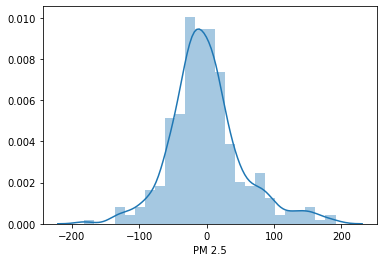

In [30]:
sns.distplot(y_test-y_pred)

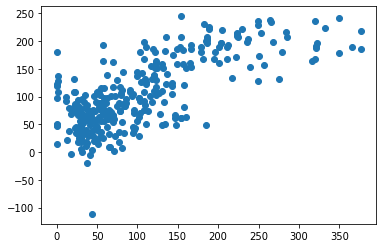

In [31]:
plt.scatter(y_test,y_pred)

# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [32]:
from sklearn import metrics

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 39.779762799686175
MSE: 2953.309685674336
RMSE: 54.34436204128572


In [34]:
import pickle 

In [35]:
# open a file, where you ant to store the data
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)